In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/content/drive/MyDrive/YBIGTA/신입기수 프로젝트/')

In [2]:
!apt -qq -y install fonts-nanum > /dev/null

In [3]:
import matplotlib.font_manager as fm

font = fm.FontProperties(fname='AppleGothic.ttf', size=10)
fm._rebuild()

In [4]:
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='NanumBarunGothic')

In [5]:
data = pd.read_csv('rawdata.csv')
data

,날짜,현재수위,유입량,저수량,공용량,방류량,강화대교_조위,청담대교_유량,잠수교_유량,한강대교_유량,행주대교_유량,대곡교_강수량,진관교_강수량,송정동_강수량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2012-05-01 00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0,310.7,300.2,290.0,275.3
1,2012-05-01 00:10,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2,2012-05-01 00:20,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0,313.7,301.2,290.0,275.3
3,2012-05-01 00:30,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0,311.7,301.2,290.0,276.3
4,2012-05-01 00:40,24.789,478.10,218.69,25.31,576.40,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10,25.040,259.23,212.86,31.14,259.23,510.0,319.84,NaN,-456.41,974.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276332,2022-07-18 23:20,25.040,260.46,212.86,31.14,260.46,492.0,314.01,NaN,-717.30,1006.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276333,2022-07-18 23:30,25.040,259.37,212.86,31.14,259.37,475.0,387.55,NaN,-843.37,1039.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276334,2022-07-18 23:40,25.040,259.13,212.86,31.14,259.13,458.0,454.91,NaN,-1023.37,1073.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 강화대교 조위 결측치 처리

In [6]:
gangwha = data[['날짜', '강화대교_조위']]
gangwha

,날짜,강화대교_조위
0,2012-05-01 00:00,445.0
1,2012-05-01 00:10,449.0
2,2012-05-01 00:20,451.0
3,2012-05-01 00:30,452.0
4,2012-05-01 00:40,450.0
...,...,...
276331,2022-07-18 23:10,510.0
276332,2022-07-18 23:20,492.0
276333,2022-07-18 23:30,475.0
276334,2022-07-18 23:40,458.0


In [7]:
gangwha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   날짜       276336 non-null  object 
 1   강화대교_조위  271409 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.2+ MB


In [8]:
gangwha.날짜 = pd.to_datetime(gangwha.날짜)
gangwha

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,날짜,강화대교_조위
0,2012-05-01 00:00:00,445.0
1,2012-05-01 00:10:00,449.0
2,2012-05-01 00:20:00,451.0
3,2012-05-01 00:30:00,452.0
4,2012-05-01 00:40:00,450.0
...,...,...
276331,2022-07-18 23:10:00,510.0
276332,2022-07-18 23:20:00,492.0
276333,2022-07-18 23:30:00,475.0
276334,2022-07-18 23:40:00,458.0


In [9]:
gangwha[gangwha['강화대교_조위'].isnull()]   # 4927개의 결측치 : 순서대로 채우기

,날짜,강화대교_조위
193,2012-05-02 08:10:00,NaN
307,2012-05-03 03:10:00,NaN
1359,2012-05-10 10:30:00,NaN
1377,2012-05-10 13:30:00,NaN
1378,2012-05-10 13:40:00,NaN
...,...,...
267172,2022-05-16 08:40:00,NaN
270004,2022-06-05 00:40:00,NaN
270383,2022-06-07 15:50:00,NaN
272504,2022-06-22 09:20:00,NaN


In [10]:
nan_index = list(gangwha[gangwha['강화대교_조위'].isnull()].index)
nan_index

[193,
 307,
 1359,
 1377,
 1378,
 1379,
 1380,
 1381,
 1382,
 1383,
 1384,
 1385,
 1386,
 1387,
 1388,
 1389,
 1390,
 1391,
 1392,
 1393,
 1394,
 1395,
 1396,
 1397,
 1398,
 1399,
 1400,
 1401,
 1402,
 1403,
 1404,
 1405,
 1406,
 1407,
 1408,
 1409,
 1410,
 1411,
 1412,
 1413,
 1414,
 1415,
 1416,
 1417,
 1418,
 1419,
 1420,
 1421,
 1422,
 1423,
 1424,
 1425,
 1426,
 1427,
 1428,
 1429,
 1430,
 1431,
 1432,
 1433,
 1434,
 1435,
 1436,
 1437,
 1438,
 1439,
 1440,
 1441,
 1442,
 1443,
 1444,
 1445,
 1446,
 1447,
 1448,
 1449,
 1450,
 1451,
 1452,
 1453,
 1454,
 1455,
 1456,
 1457,
 1458,
 1459,
 1460,
 1461,
 1462,
 1463,
 1464,
 1465,
 1466,
 1467,
 1468,
 1469,
 1470,
 1471,
 1472,
 1473,
 1474,
 1475,
 1476,
 1477,
 1478,
 1479,
 1480,
 1481,
 1482,
 1483,
 1484,
 1485,
 1486,
 1487,
 1488,
 1489,
 1490,
 1491,
 1492,
 1493,
 1494,
 1495,
 1496,
 1497,
 1498,
 1499,
 1500,
 1501,
 1502,
 1503,
 1504,
 1505,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 

Text(0, 0.5, '강화대교 조위')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_

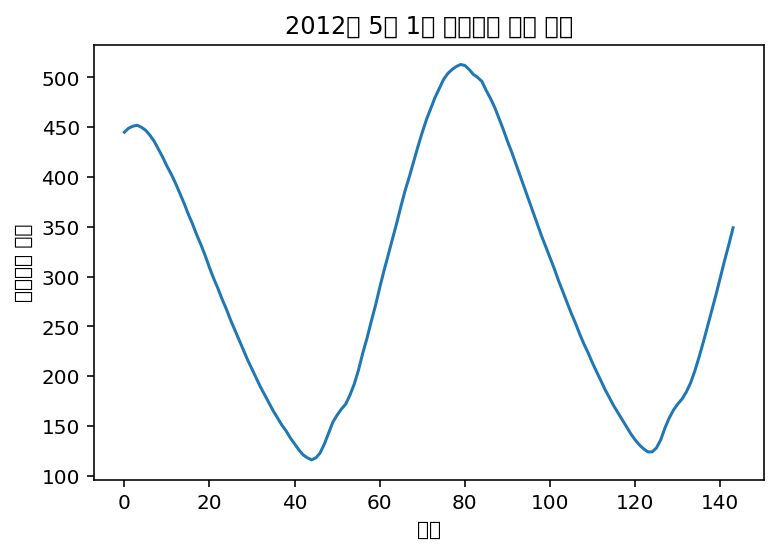

In [11]:
# 하루 동안 조위 변화 추이 확인

plt.plot(range(0, 144), gangwha[0:144].강화대교_조위)
plt.title('2012년 5월 1일 강화대교 조위 변화')
plt.xlabel('시간')
plt.ylabel('강화대교 조위')

In [12]:
# 결측값 대치 (보간법)

gangwha = gangwha.set_index('날짜')
gangwha_interpolate = gangwha.interpolate(method='time')
gangwha_interpolate

,강화대교_조위
날짜,
2012-05-01 00:00:00,445.0
2012-05-01 00:10:00,449.0
2012-05-01 00:20:00,451.0
2012-05-01 00:30:00,452.0
2012-05-01 00:40:00,450.0
...,...
2022-07-18 23:10:00,510.0
2022-07-18 23:20:00,492.0
2022-07-18 23:30:00,475.0


In [13]:
gangwha_interpolate.isnull().sum()

강화대교_조위    0
dtype: int64

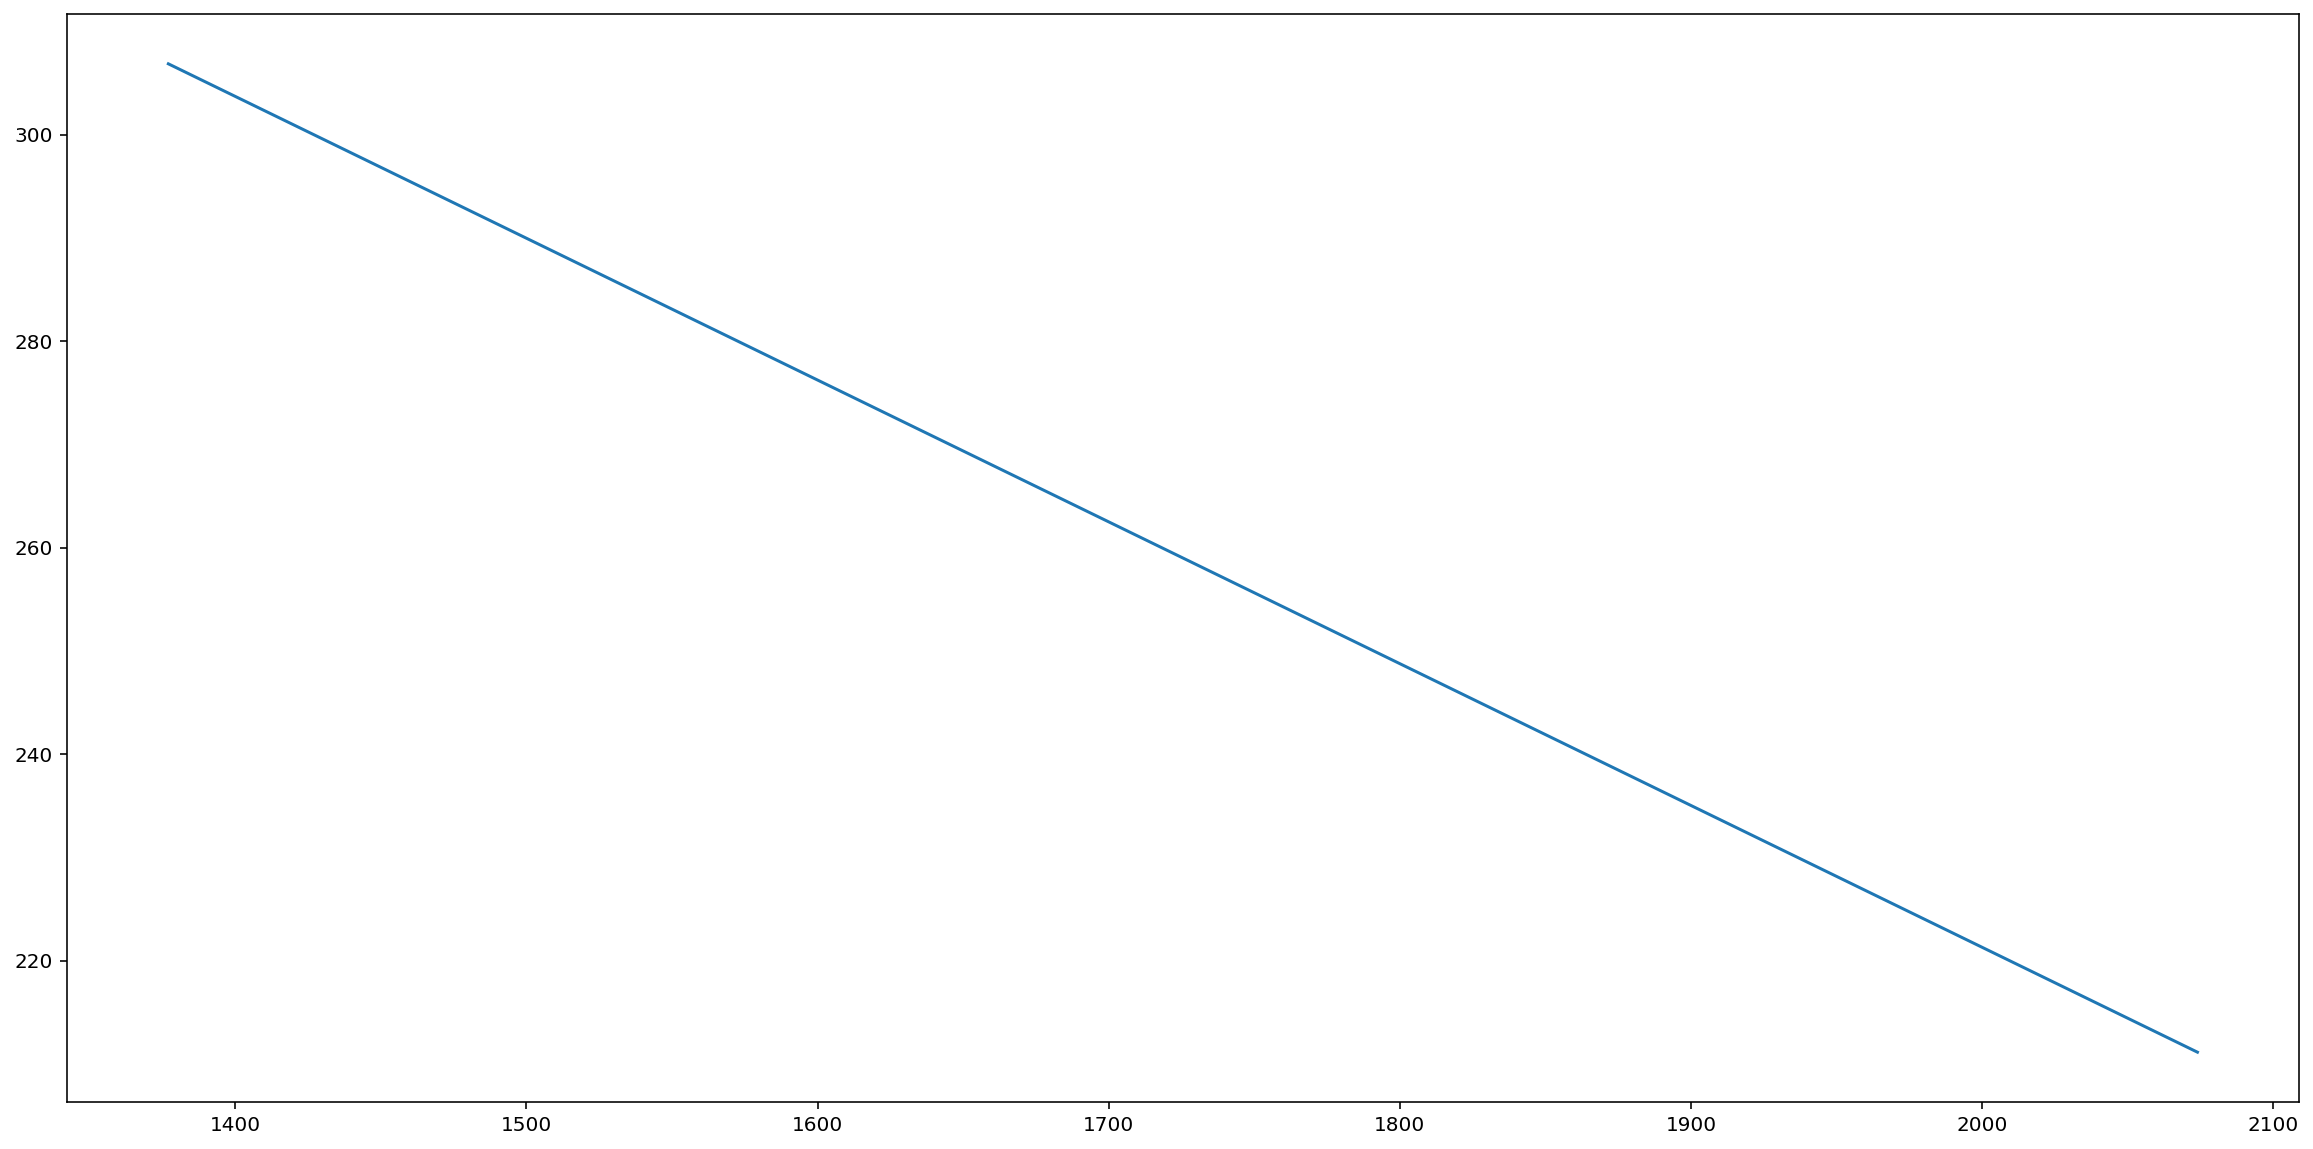

In [27]:
plt.figure(figsize=(20, 10))

plt.scatter(x=gangwha_interpolate.index, y=gangwha_interpolate['']) 문제 생김

In [14]:
# gangwha_interpolate.to_csv('강화대교_조위_보간.csv')